# Ujian Praktik Natural Languange Processing Orbit Future Academy AI Mastery Program 

# 01 Data Acquisition

# Import library

In [ ]:
import numpy as np 
import pandas as pd
import re
import tensorflow as tf
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
data = pd.read_csv('/content/dataset_tweet_sentimen_tayangan_tv.csv')
data.head()


Id Sentiment           Acara TV  Jumlah Retweet  \
0      1  positive  HitamPutihTransTV              12   
1      2  positive  HitamPutihTransTV               6   
2      3  positive  HitamPutihTransTV               9   
3      4  positive  HitamPutihTransTV               2   
4      5  positive  HitamPutihTransTV               1   
..   ...       ...                ...             ...   
395  396  negative   MataNajwaMetroTV               0   
396  397  negative   MataNajwaMetroTV               0   
397  398  negative   MataNajwaMetroTV               0   
398  399  negative   MataNajwaMetroTV               0   
399  400  negative   MataNajwaMetroTV               0   

                                            Text Tweet  
0    Undang @N_ShaniJKT48 ke hitamputih, pemenang S...  
1    Selamat berbuka puasa Semoga amal ibadah hari ...  
2    Ada nih di trans7 hitam putih, dia dpt penghar...  
3          selamat ya mas @adietaufan masuk hitamputih  
4                    Asiknya nonton Hitam Putih Trans7  
..                                                 ...  
395  ini apa banget deh gw paling kesel klo orang2 ...  
396  Orang miskin semakin miskin klo sekolah melaku...  
397  ga boLeh emosi, cepat tua, nonton #matanajwame...  
398  dr penampilan saja kyk preman taunya bkin kisr...  
399  Jawab aja ga usah berbelit-belit. Muter2 ga je...  

[400 rows x 5 columns]

In [ ]:
data = data.rename(columns={'Text Tweet': 'tweet'})
data.rename(columns={'Text Tweet': 'tweet'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   tweet           400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [ ]:
data["Sentiment"].value_counts()

positive    200
negative    200
Name: Sentiment, dtype: int64

# 02 Preprocessing Data

# Casefolding Tweet

In [ ]:
# Buat fungsi untuk langkah case folding
def tweet_casefolding(text):
    text = text.lower()                               # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
    text = text.strip()
    return text

In [ ]:
raw_sample = data['tweet'].iloc[105]
case_folding = tweet_casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:  Saya punya Panglima yang membanggakan, ILC tvOne https://youtu.be/tR2tN1u7eAw


Case folding	:  saya punya panglima yang membanggakan ilc tvone


# Stopword Tweet

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stopwords_tweet = stopwords.words('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(stopwords_tweet)

758

In [ ]:
stopwords_tweet

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['username', 'yang', 'dan','yg','di','bgt'
                ,'ini','ga','itu','jdi','sama','sm',
                 'ya','gk','gak','lo','nya','si','aja','org','ya',
                 'sih','att','lg','udh','sok','jgn','mbak','krn',
                 'jg','dr','d','kl','lu','arti','mba','...','tp']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_tweet + more_stopword

def tweet_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [ ]:
raw_sample = data['tweet'].iloc[10]
case_folding = tweet_casefolding(raw_sample)
stopword_removal = tweet_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal:', stopword_removal)

Raw data	:  cinta mengikat silaturahmi di hati ... #LunaMaya #hitamputihtrans7 .... https://www.instagram.com/p/BTqszJ3jO9A/


Case folding	:  cinta mengikat silaturahmi di hati  lunamaya hitamputihtrans


Stopword removal: cinta mengikat silaturahmi hati lunamaya hitamputihtrans


# Stemming Tweet

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [ ]:
raw_sample       = data['tweet'].iloc[196]
case_folding     = tweet_casefolding(raw_sample)
stopword_removal = tweet_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal:', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  #ILCtvone mendengar cerita bu marwah aku merasa bodoh, memalukan


Case folding	:  ilctvone mendengar cerita bu marwah aku merasa bodoh memalukan


Stopword removal: ilctvone mendengar cerita bu marwah bodoh memalukan


Stemming	:  ilctvone dengar cerita bu marwah bodoh malu


# Lemmatizeer Tweet

In [ ]:
import string
nltk.download('wordnet')
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_tweet(text, lemmatize = True):
  soup = BeautifulSoup(text, "html.parser") #Remove HTML Tags
  text = re.sub(r'\.(?=/S)','. ', text)
  text = soup.get_text()
  text = "".join([word.lower() for word in text if word not in string.punctuation])

  if lemmatize :
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stopwords_tweet and word.isalpha()]) #Lemmetize
  else:
      test = " ".join([word for word in text.split() if word not in stopwords_tweet and word.isalpha()])
  return text

In [ ]:
raw_sample       = data['tweet'].iloc[100]
case_folding     = tweet_casefolding(raw_sample)
stopword_removal = tweet_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  Suka banget nonton #IndonesiaLawyersClub bisa menambah wawasan, bisa belajar cara membicarakan suatu masalah, keren @ILC_tvOnenews


Case folding	:  suka banget nonton indonesialawyersclub bisa menambah wawasan bisa belajar cara membicarakan suatu masalah keren ilc_tvonenews


Stopword removal:  suka banget nonton indonesialawyersclub menambah wawasan belajar membicarakan keren ilc_tvonenews


Stemming	:  suka banget nonton indonesialawyersclub tambah wawas ajar bicara keren ilc tvonenews


# Text Preprocessing

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = tweet_casefolding(text)
    text = tweet_stop_words(text)
    #text = stemming(text)
    #text = clean_igcomment(text)
    return text

In [ ]:
pip -q install swifter

In [ ]:
import swifter
%time

data['clean_tweet'] = data['tweet'].swifter.apply(text_preprocessing_process)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 10 µs


Pandas Apply:   0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
data.to_csv('clean_teks.csv')

In [ ]:
data

Id Sentiment           Acara TV  Jumlah Retweet  \
0      1  positive  HitamPutihTransTV              12   
1      2  positive  HitamPutihTransTV               6   
2      3  positive  HitamPutihTransTV               9   
3      4  positive  HitamPutihTransTV               2   
4      5  positive  HitamPutihTransTV               1   
..   ...       ...                ...             ...   
395  396  negative   MataNajwaMetroTV               0   
396  397  negative   MataNajwaMetroTV               0   
397  398  negative   MataNajwaMetroTV               0   
398  399  negative   MataNajwaMetroTV               0   
399  400  negative   MataNajwaMetroTV               0   

                                                 tweet  \
0    Undang @N_ShaniJKT48 ke hitamputih, pemenang S...   
1    Selamat berbuka puasa Semoga amal ibadah hari ...   
2    Ada nih di trans7 hitam putih, dia dpt penghar...   
3          selamat ya mas @adietaufan masuk hitamputih   
4                    Asiknya nonton Hitam Putih Trans7   
..                                                 ...   
395  ini apa banget deh gw paling kesel klo orang2 ...   
396  Orang miskin semakin miskin klo sekolah melaku...   
397  ga boLeh emosi, cepat tua, nonton #matanajwame...   
398  dr penampilan saja kyk preman taunya bkin kisr...   
399  Jawab aja ga usah berbelit-belit. Muter2 ga je...   

                                           clean_tweet  
0    undang n_shanijkt hitamputih pemenang ssk jkt ...  
1    selamat berbuka puasa semoga amal ibadah ni di...  
2    nih trans hitam putih dpt penghargaan norwegia...  
3              selamat mas adietaufan masuk hitamputih  
4                     asiknya nonton hitam putih trans  
..                                                 ...  
395  banget deh gw kesel klo orang debat pake emosi...  
396      orang miskin miskin klo sekolah pungutan liar  
397  emosi cepat tua nonton matanajwametrotv lihat ...  
398  penampilan kyk preman taunya bkin kisruh perus...  
399    berbelitbelit muter buang mutu matanajwametrotv  

[400 rows x 6 columns]

In [ ]:
data.Sentiment = [ 1 if each == "positive" else 0 for each in data.Sentiment ]
data

Id  Sentiment           Acara TV  Jumlah Retweet  \
0      1          1  HitamPutihTransTV              12   
1      2          1  HitamPutihTransTV               6   
2      3          1  HitamPutihTransTV               9   
3      4          1  HitamPutihTransTV               2   
4      5          1  HitamPutihTransTV               1   
..   ...        ...                ...             ...   
395  396          0   MataNajwaMetroTV               0   
396  397          0   MataNajwaMetroTV               0   
397  398          0   MataNajwaMetroTV               0   
398  399          0   MataNajwaMetroTV               0   
399  400          0   MataNajwaMetroTV               0   

                                                 tweet  \
0    Undang @N_ShaniJKT48 ke hitamputih, pemenang S...   
1    Selamat berbuka puasa Semoga amal ibadah hari ...   
2    Ada nih di trans7 hitam putih, dia dpt penghar...   
3          selamat ya mas @adietaufan masuk hitamputih   
4                    Asiknya nonton Hitam Putih Trans7   
..                                                 ...   
395  ini apa banget deh gw paling kesel klo orang2 ...   
396  Orang miskin semakin miskin klo sekolah melaku...   
397  ga boLeh emosi, cepat tua, nonton #matanajwame...   
398  dr penampilan saja kyk preman taunya bkin kisr...   
399  Jawab aja ga usah berbelit-belit. Muter2 ga je...   

                                           clean_tweet  
0    undang n_shanijkt hitamputih pemenang ssk jkt ...  
1    selamat berbuka puasa semoga amal ibadah ni di...  
2    nih trans hitam putih dpt penghargaan norwegia...  
3              selamat mas adietaufan masuk hitamputih  
4                     asiknya nonton hitam putih trans  
..                                                 ...  
395  banget deh gw kesel klo orang debat pake emosi...  
396      orang miskin miskin klo sekolah pungutan liar  
397  emosi cepat tua nonton matanajwametrotv lihat ...  
398  penampilan kyk preman taunya bkin kisruh perus...  
399    berbelitbelit muter buang mutu matanajwametrotv  

[400 rows x 6 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    int64 
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   tweet           400 non-null    object
 5   clean_tweet     400 non-null    object
dtypes: int64(3), object(3)
memory usage: 18.9+ KB


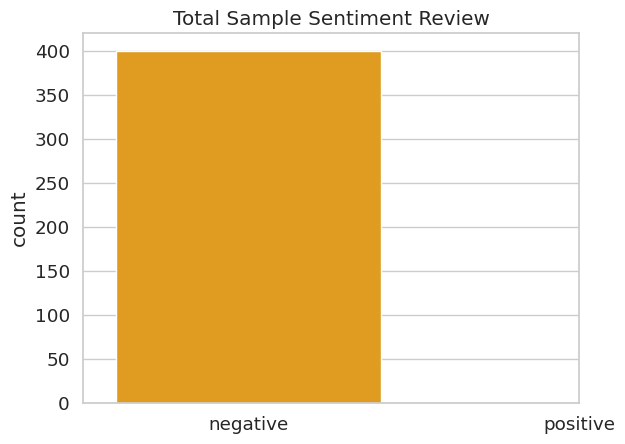

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
sns.countplot(data.Sentiment, palette = ['orange','blue'])
plt.xticks(ticks=np.arange(2), labels=['negative', 'positive'])
plt.title('Total Sample Sentiment Review')
plt.show()

In [ ]:
print('Jumlah Sentiment Negative', (round(data['Sentiment'].value_counts()[0])), 'Percentage:', round(data['Sentiment'].value_counts()[0]/len(data) * 100,2), '%')
print('Jumlah Sentiment Positive', (round(data['Sentiment'].value_counts()[1])), 'Percentage:', round(data['Sentiment'].value_counts()[1]/len(data) * 100,2), '%')

Jumlah Sentiment Negative 200 Percentage: 50.0 %
Jumlah Sentiment Positive 200 Percentage: 50.0 %


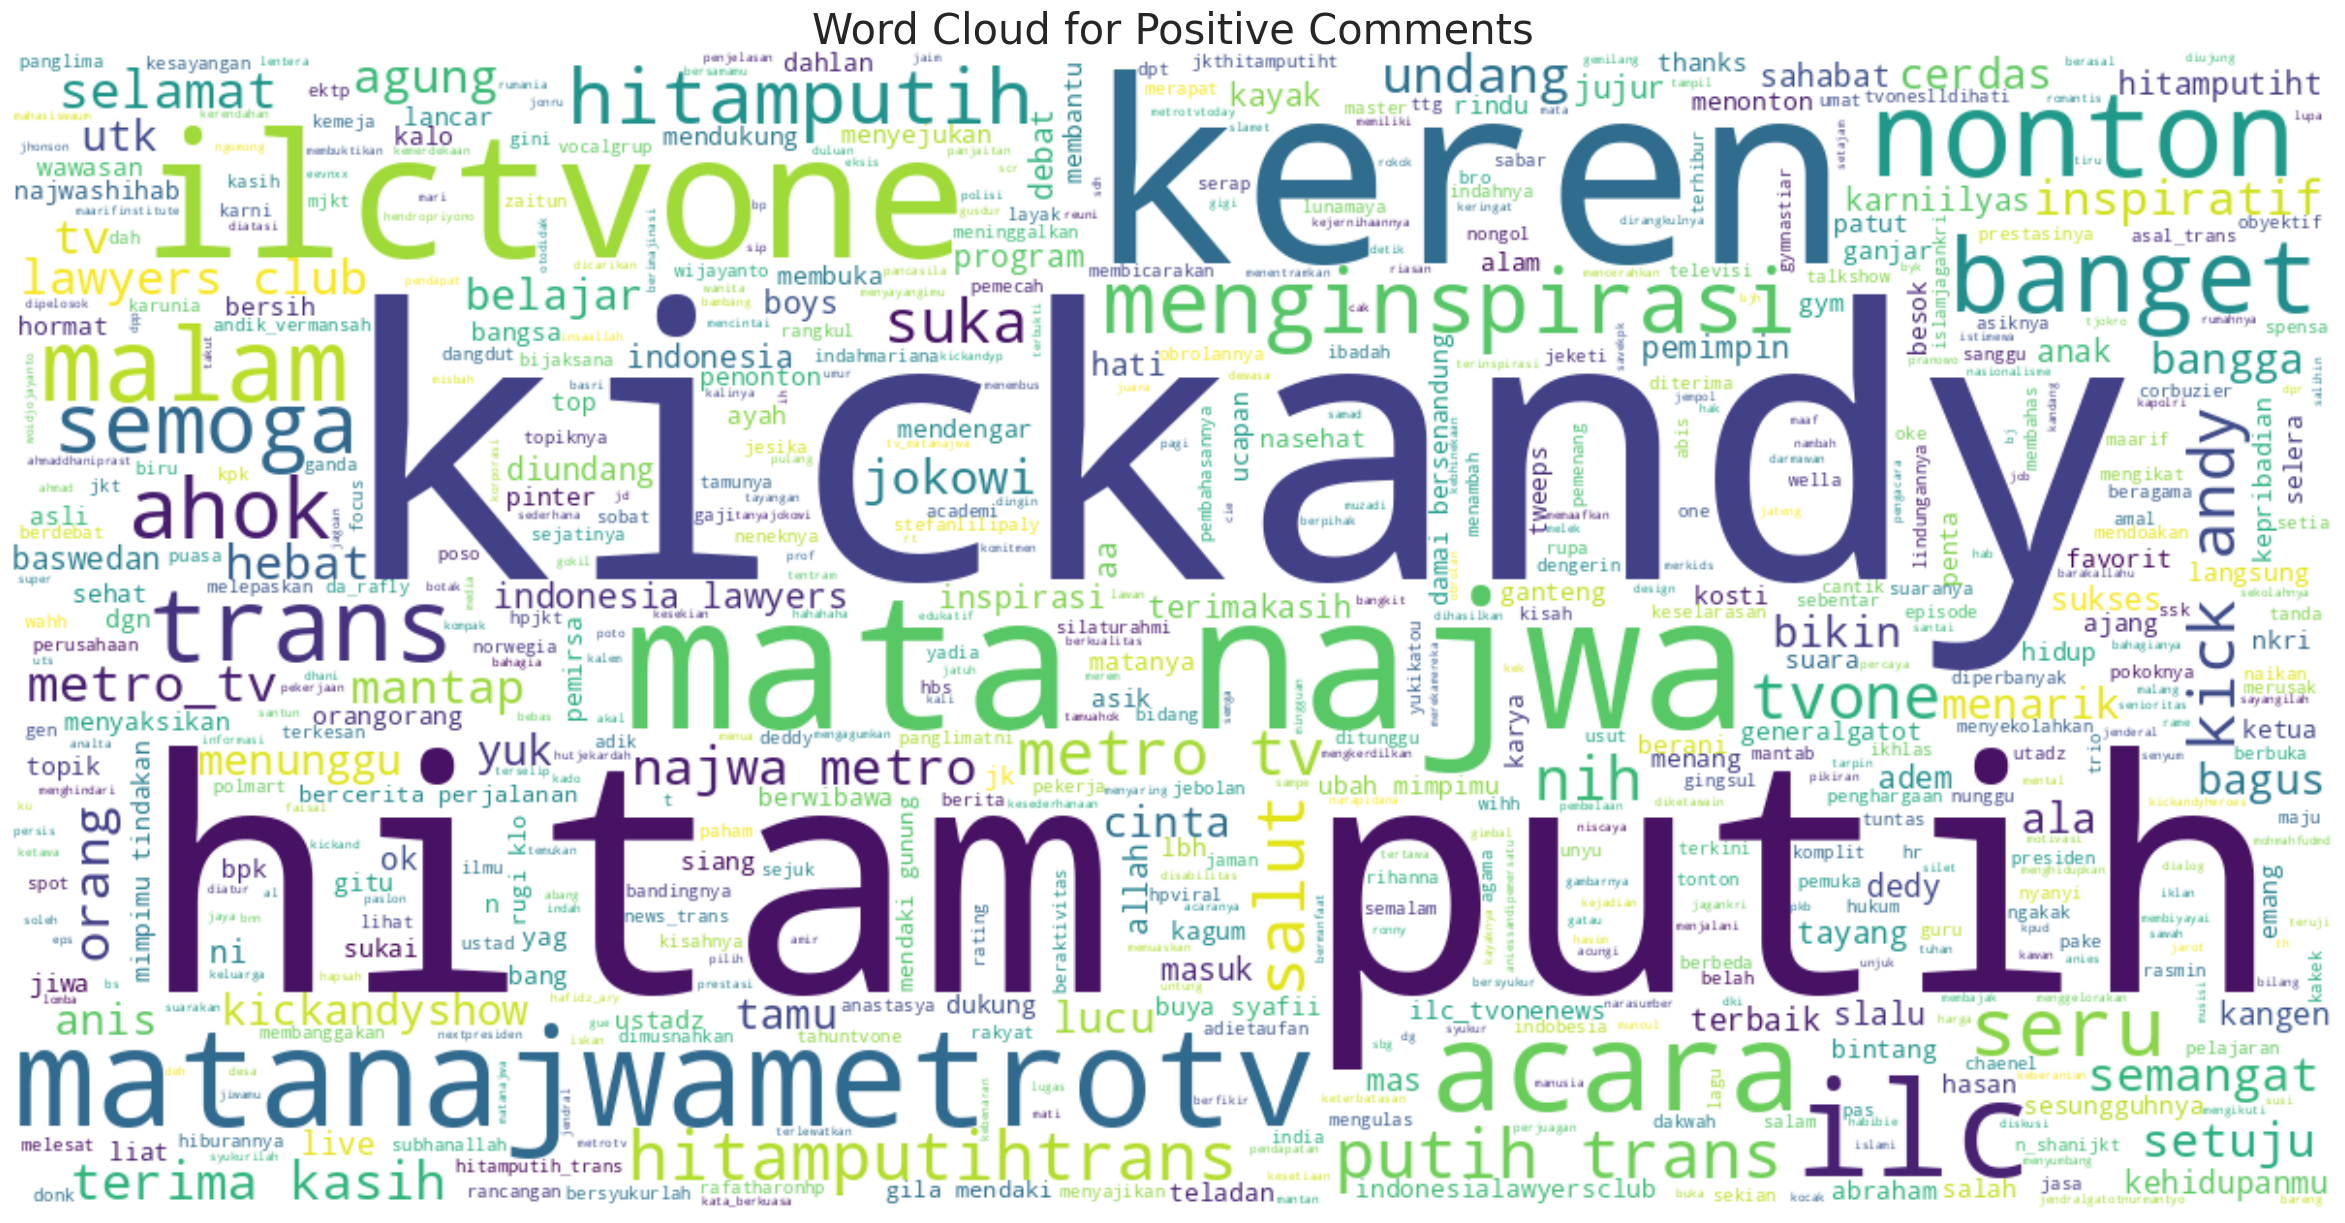

In [ ]:
#Word Cloud for Positive Reviews
import os
from wordcloud import WordCloud

positive_data = data[data.Sentiment == 1]['clean_tweet']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (30,30))
wc = WordCloud(max_words = 2500, width = 1200, height = 600, background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Comments' , fontsize = 30)
plt.show()

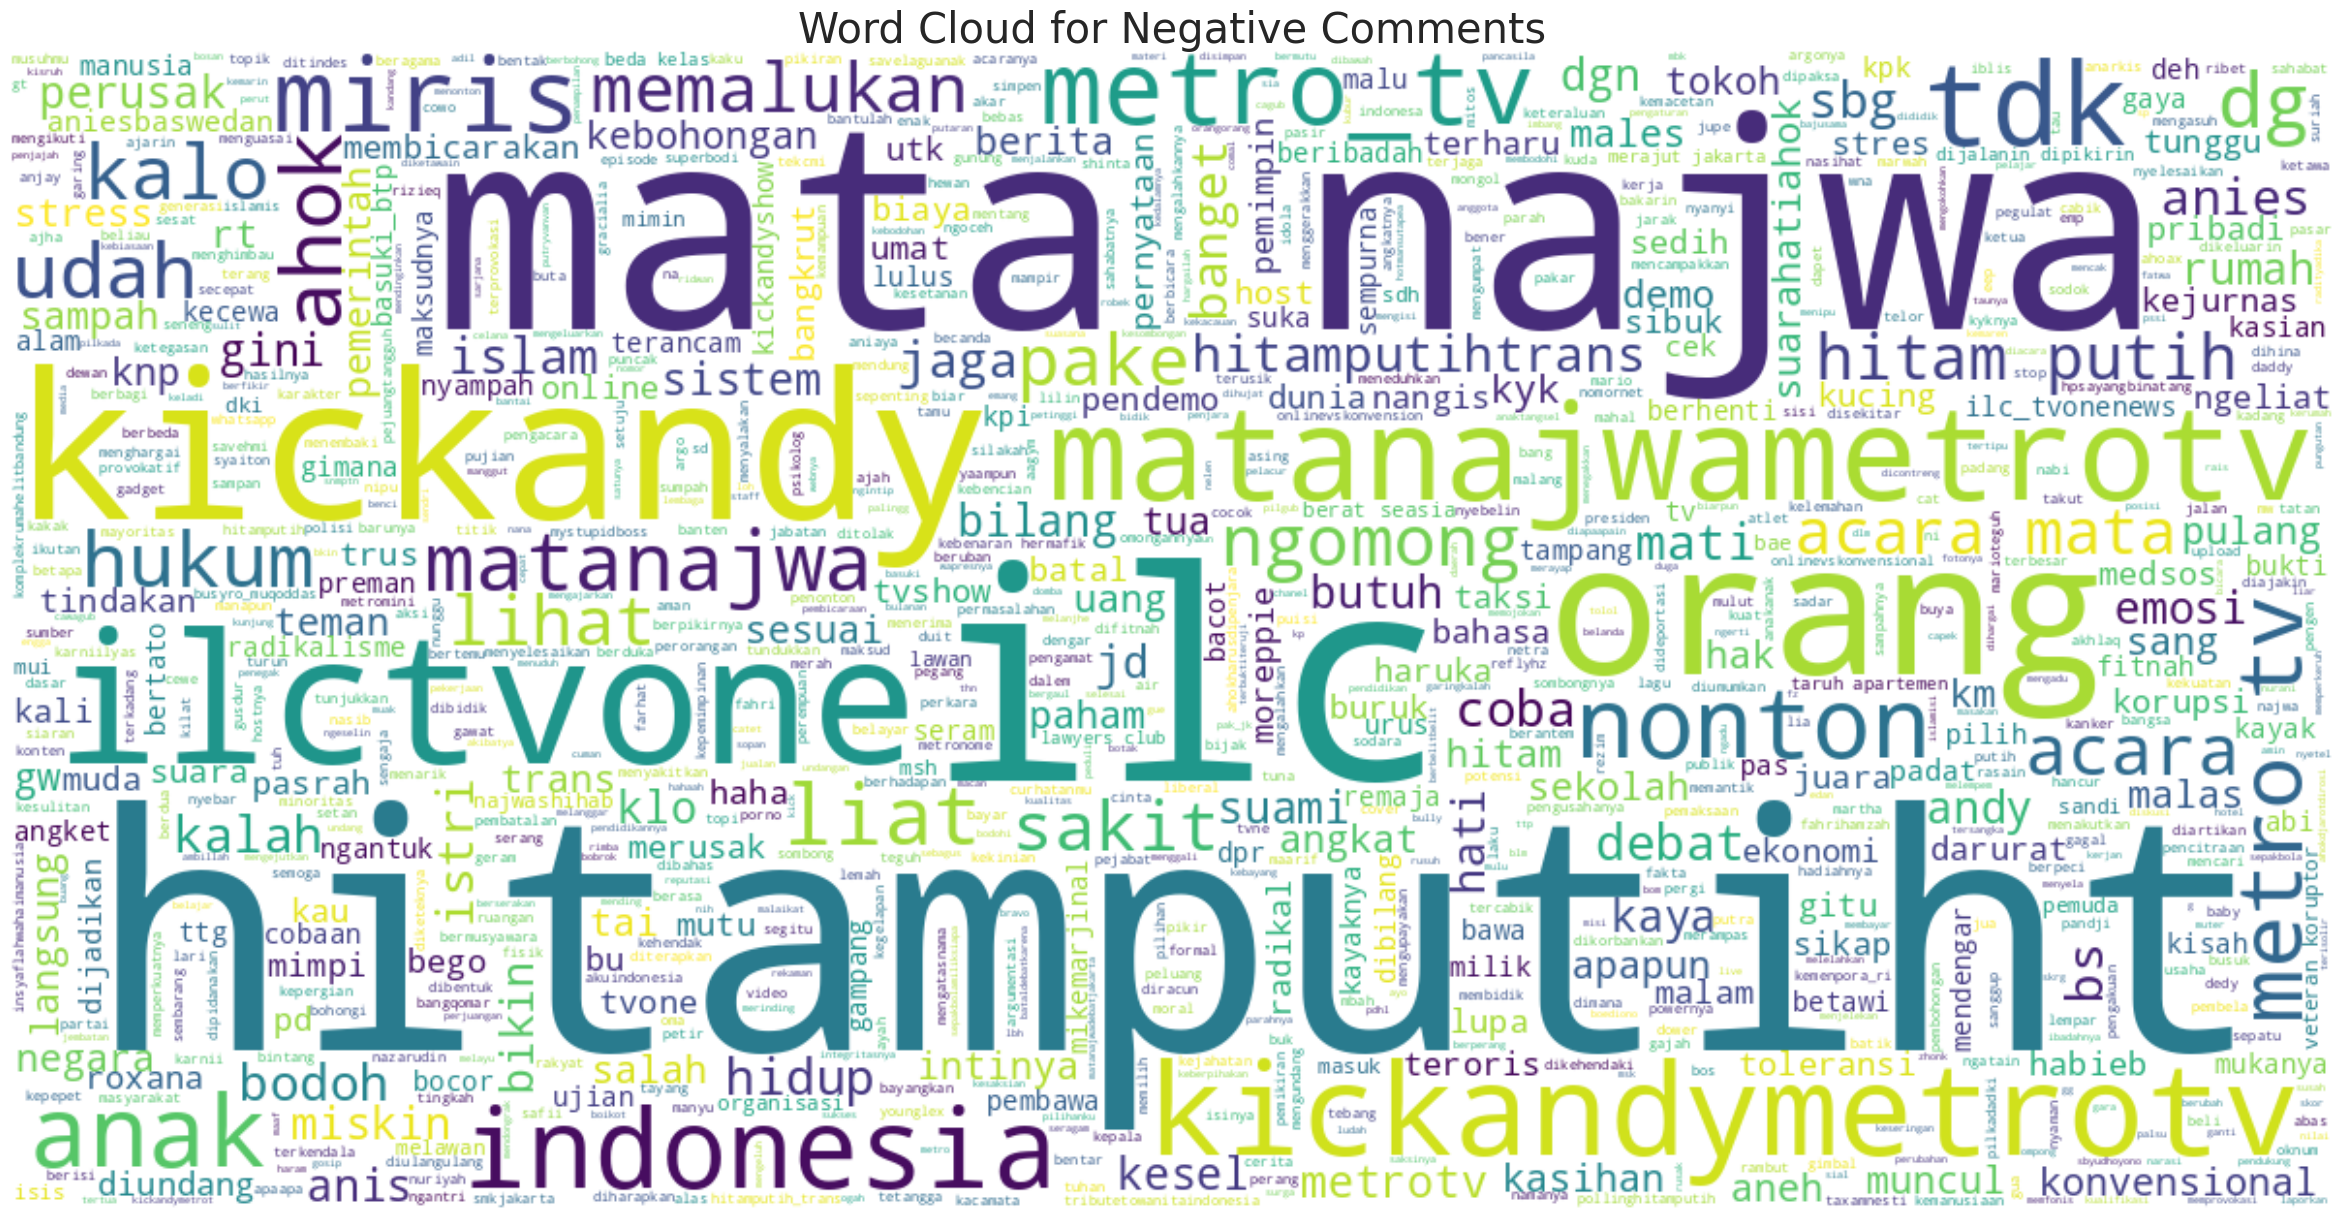

In [ ]:
#Word Cloud for Negative Reviews

negative_data = data[data.Sentiment == 0]['clean_tweet']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (30,30))
wc = WordCloud(max_words = 2500, width = 1200, height = 600, background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Comments' , fontsize = 30)
plt.show()

In [ ]:
def get_corpus(text):
  words = []
  for i in text:
    for j in i.split():
      words.append(j.strip())
    return words
corpus= get_corpus(data.clean_tweet)
corpus[:5]


['undang', 'n_shanijkt', 'hitamputih', 'pemenang', 'ssk']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common, columns = ['corpus','countv'])
most_common

corpus  countv
0       undang       2
1   n_shanijkt       1
2   hitamputih       1
3     pemenang       1
4          ssk       1
5          jkt       1
6         mjkt       1
7        layak       1
8  prestasinya       1

In [ ]:
most_common = most_common.sort_values('countv')

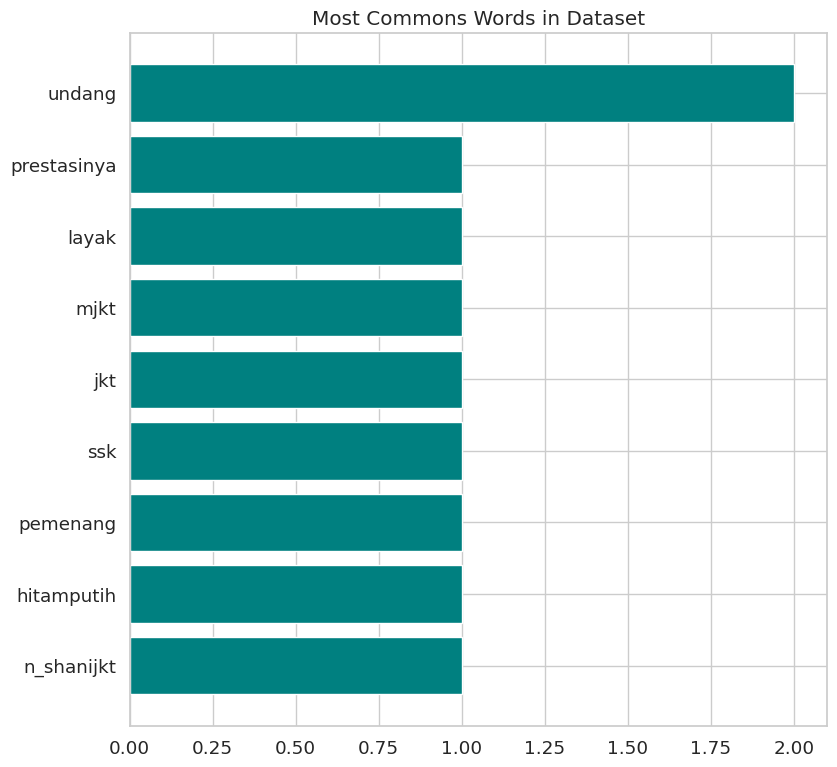

In [ ]:
plt.figure(figsize=(9,9))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv), align = 'center', color='#008080')
plt.title('Most Commons Words in Dataset')
plt.show()

# 03 Feature Extraction (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(3,3))
tf_idf.fit(data['clean_tweet'])

TfidfVectorizer(ngram_range=(3, 3))

In [ ]:
#Melihat Jumlah Fitur

print(len(tf_idf.get_feature_names_out()))

2146


In [ ]:
#Melihat fitur-fitur apa saja yang ada didalam corpus

print(tf_idf.get_feature_names_out())

['aa gym menyejukan' 'aa gym semoga' 'aa gymnastiar ilc' ...
 'yuk tweeps merapat' 'yukikatou nongol hitam' 'zaitun rasmin ilc']


In [ ]:
X_tf_idf = tf_idf.transform(data['clean_tweet']).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns = tf_idf.get_feature_names_out())
data_tf_idf

aa gym menyejukan  aa gym semoga  aa gymnastiar ilc  aagym partai tokoh  \
0                  0.0            0.0                0.0                 0.0   
1                  0.0            0.0                0.0                 0.0   
2                  0.0            0.0                0.0                 0.0   
3                  0.0            0.0                0.0                 0.0   
4                  0.0            0.0                0.0                 0.0   
..                 ...            ...                ...                 ...   
395                0.0            0.0                0.0                 0.0   
396                0.0            0.0                0.0                 0.0   
397                0.0            0.0                0.0                 0.0   
398                0.0            0.0                0.0                 0.0   
399                0.0            0.0                0.0                 0.0   

     abang pengacara botak  abas anjay bener  abi manyu kasian  \
0                      0.0               0.0               0.0   
1                      0.0               0.0               0.0   
2                      0.0               0.0               0.0   
3                      0.0               0.0               0.0   
4                      0.0               0.0               0.0   
..                     ...               ...               ...   
395                    0.0               0.0               0.0   
396                    0.0               0.0               0.0   
397                    0.0               0.0               0.0   
398                    0.0               0.0               0.0   
399                    0.0               0.0               0.0   

     abis jesika cantik  abis kalo cewe  abraham samad inspirasi  ...  \
0                   0.0             0.0                      0.0  ...   
1                   0.0             0.0                      0.0  ...   
2                   0.0             0.0                      0.0  ...   
3                   0.0             0.0                      0.0  ...   
4                   0.0             0.0                      0.0  ...   
..                  ...             ...                      ...  ...   
395                 0.0             0.0                      0.0  ...   
396                 0.0             0.0                      0.0  ...   
397                 0.0             0.0                      0.0  ...   
398                 0.0             0.0                      0.0  ...   
399                 0.0             0.0                      0.0  ...   

     woidjojayanto matanajwametrotv savekpk  yaampun anak nonton  \
0                                       0.0                  0.0   
1                                       0.0                  0.0   
2                                       0.0                  0.0   
3                                       0.0                  0.0   
4                                       0.0                  0.0   
..                                      ...                  ...   
395                                     0.0                  0.0   
396                                     0.0                  0.0   
397                                     0.0                  0.0   
398                                     0.0                  0.0   
399                                     0.0                  0.0   

     yadia jebolan dangdut  yag hebat keren  younglex udah gt  \
0                      0.0              0.0               0.0   
1                      0.0              0.0               0.0   
2                      0.0              0.0               0.0   
3                      0.0              0.0               0.0   
4                      0.0              0.0               0.0   
..                     ...              ...               ...   
395                    0.0              0.0               0.0   
396                    0.0           

# 04 Build Model dengan Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, data['Sentiment'], test_size=0.2, random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_kbest_features,data['Sentiment'])
predict1=lr.predict(X_test)
score1=accuracy_score(y_test,predict1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*score1))

Logistic Regression Accuracy : 71.25%


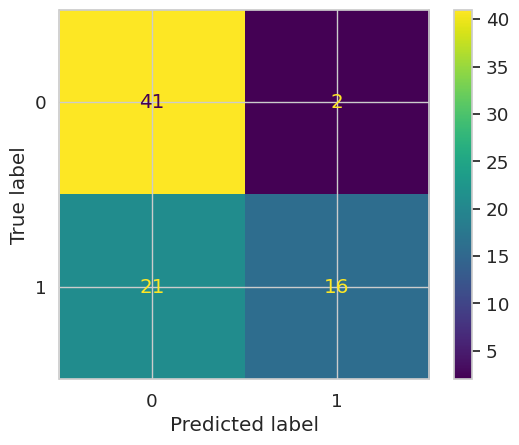

In [ ]:
predictions = lr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=lr.classes_)
disp.plot()

In [ ]:
logistic_pred = lr.predict(X_test)

logistic_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
#Performa Model Logistic Regresi
from sklearn.metrics import classification_report

print('Classification Report:\n', classification_report(y_test,logistic_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.95      0.78        43
           1       0.89      0.43      0.58        37

    accuracy                           0.71        80
   macro avg       0.78      0.69      0.68        80
weighted avg       0.77      0.71      0.69        80



# 05 Featured Selection (Chi-Square)

In [ ]:
X = np.array(data_tf_idf)
y = np.array (y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Ten Features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=100 )
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number', X_kbest_features.shape[1])

Original feature number: 2146
Reduced feature number 100


In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi
# Beserta nilai vektornya pada keseluruhan  data untuk dijalankan pada proses machine learning
# hanya K fitur yang terpilih sesuai parameter k yang sebellumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns = selected_feature)
data_selected_feature

aa  acara  adem  agung  apapun  asik  bagus  banget  bangga  berani  \
0    0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
1    0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
2    0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
3    0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
4    0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
..   ...    ...   ...    ...     ...   ...    ...     ...     ...     ...   
395  0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
396  0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
397  0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
398  0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   
399  0.0    0.0   0.0    0.0     0.0   0.0    0.0     0.0     0.0     0.0   

     ...  terbaik  terima  terimakasih  trans  tvone      uang  udah  undang  \
0    ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
1    ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
2    ...      0.0     0.0          0.0    0.0    0.0  0.369801   0.0     0.0   
3    ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
4    ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
..   ...      ...     ...          ...    ...    ...       ...   ...     ...   
395  ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
396  ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
397  ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
398  ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   
399  ...      0.0     0.0          0.0    0.0    0.0  0.000000   0.0     0.0   

     ustadz  yuk  
0       0.0  0.0  
1       0.0  0.0  
2       0.0  0.0  
3       0.0  0.0  
4       0.0  0.0  
..      ...  ...  
395     0.0  0.0  
396     0.0  0.0  
397     0.0  0.0  
398     0.0  0.0  
399     0.0  0.0  

[400 rows x 100 columns]

# 06 Machine Learning (Naive Bayes) **Model Yang digunakan**

In [ ]:
from sklearn.naive_bayes import MultinomialNB             #pilih salah satu algoritma supervised learning,contohnya Naive bayes
from sklearn.model_selection import train_test_split      # digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                   # digunakan untuk menyimpan model yang dilatih

In [ ]:
#disini memisahkan data uji dan data latih,perbandingan nya 20% untuk data uji dan 80% untuk data latih
#random_state digunakan untuk internal random generator

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [ ]:
#training model 
algorithm = MultinomialNB()                         #load algoritma nya
model = algorithm.fit(X_train, y_train)             #latih algoritma nya pada data latih dan label latih

#simpan model hasil training
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
#gunakan model yang telah dilatih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# menampilkan hasil prediksi label dari model
model_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 07 Performa model yang dihasilkan

In [ ]:
# hitung jumlah data yang berhasil di prediksi model dan jumlah data yang telah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 30
Jumlah prediksi salah	: 50
akurasi pengujian	: 37.5 %


In [ ]:
#cross validation
from sklearn.model_selection import ShuffleSplit         #pilih untuk beberapa teknik cross validation
from sklearn.model_selection import cross_val_score      # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print ('Rata rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.525  0.525  0.55   0.5625 0.5    0.3625 0.4875 0.4625 0.55   0.5625] 

Rata rata akurasi pada cross validation: 0.50875


# 08 Evaluasi

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[ 3 40]
 [10 27]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.23      0.07      0.11        43
           1       0.40      0.73      0.52        37

    accuracy                           0.38        80
   macro avg       0.32      0.40      0.31        80
weighted avg       0.31      0.38      0.30        80

